In [136]:
import pandas as pd

# Veri setini yükleme
data_path = 'framingham.csv'
framingham_data = pd.read_csv(data_path)

framingham_data.head(), framingham_data.describe(), framingham_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


(   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
 0     1   39        4.0              0         0.0     0.0                0   
 1     0   46        2.0              0         0.0     0.0                0   
 2     1   48        1.0              1        20.0     0.0                0   
 3     0   61        3.0              1        30.0     0.0                0   
 4     0   46        3.0              1        23.0     0.0                0   
 
    prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
 0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
 1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
 2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
 3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
 4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   
 
    TenYearCHD  
 0           0  
 1

In [137]:
framingham_data.info(), framingham_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


(None,
 male                 0
 age                  0
 education          105
 currentSmoker        0
 cigsPerDay          29
 BPMeds              53
 prevalentStroke      0
 prevalentHyp         0
 diabetes             0
 totChol             50
 sysBP                0
 diaBP                0
 BMI                 19
 heartRate            1
 glucose            388
 TenYearCHD           0
 dtype: int64)

In [138]:
# Klinik olarak önemli olan sütunlardaki eksik değerleri düşürme
framingham_data.dropna(subset=['glucose', 'totChol', 'BPMeds', 'BMI', 'heartRate'], inplace=True)


# Diğer sütunlardaki eksik değerleri sıfır ile doldurma
for column in ['education', 'cigsPerDay']:
    framingham_data[column].fillna(0, inplace=True)

# Veri setinin son durumunu kontrol etme
framingham_data.info(), framingham_data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 3776 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3776 non-null   int64  
 1   age              3776 non-null   int64  
 2   education        3776 non-null   float64
 3   currentSmoker    3776 non-null   int64  
 4   cigsPerDay       3776 non-null   float64
 5   BPMeds           3776 non-null   float64
 6   prevalentStroke  3776 non-null   int64  
 7   prevalentHyp     3776 non-null   int64  
 8   diabetes         3776 non-null   int64  
 9   totChol          3776 non-null   float64
 10  sysBP            3776 non-null   float64
 11  diaBP            3776 non-null   float64
 12  BMI              3776 non-null   float64
 13  heartRate        3776 non-null   float64
 14  glucose          3776 non-null   float64
 15  TenYearCHD       3776 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 501.5 KB


/var/folders/yg/mz2zzgbs7c367n8bwgl0kd680000gn/T/ipykernel_21796/479769144.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  framingham_data[column].fillna(0, inplace=True)


(None,
 male               0
 age                0
 education          0
 currentSmoker      0
 cigsPerDay         0
 BPMeds             0
 prevalentStroke    0
 prevalentHyp       0
 diabetes           0
 totChol            0
 sysBP              0
 diaBP              0
 BMI                0
 heartRate          0
 glucose            0
 TenYearCHD         0
 dtype: int64)

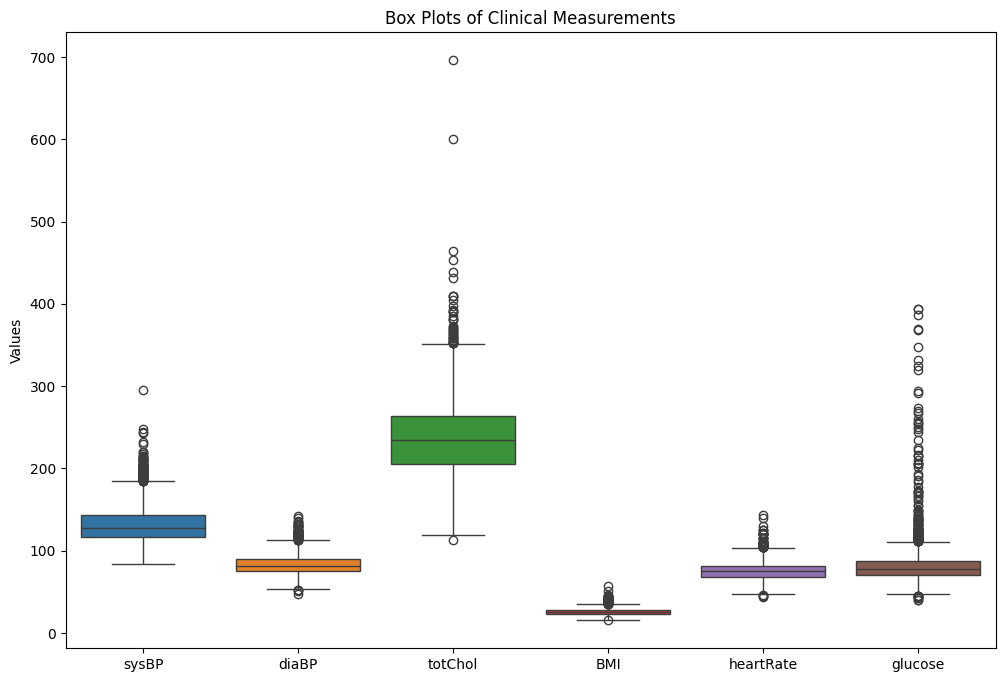

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

# İlgi çeken özellikler için outlier
features_to_plot = ['sysBP', 'diaBP', 'totChol', 'BMI','heartRate','glucose']
sns.boxplot(data=framingham_data[features_to_plot])
plt.title('Box Plots of Clinical Measurements')
plt.ylabel('Values')
plt.show()

In [140]:
# Kan basıncı bozukluklarını belirleyecek hedef özelliği oluşturma
def label_blood_pressure(row):
    if row['sysBP'] >= 140 or row['diaBP'] >= 90:
        return 1  # Hipertansiyon
    elif row['sysBP'] < 90 and row['diaBP'] < 60:
        return 1  # Hipotansiyon
    else:
        return 0  # Normal

# Hedef sütunu veri setine ekleme
framingham_data['BP_Disorder'] = framingham_data.apply(label_blood_pressure, axis=1)

# Hedef sütun ile veri setinin güncellenmiş halini kontrol etme
framingham_data[['sysBP', 'diaBP', 'BP_Disorder']].head()


,sysBP,diaBP,BP_Disorder
0,106.0,70.0,0
1,121.0,81.0,0
2,127.5,80.0,0
3,150.0,95.0,1
4,130.0,84.0,0


In [141]:
import numpy as np
# Korelasyon matrisini hesaplama
correlation_matrix = framingham_data.corr()

# 0.7'den yüksek korelasyonları gösteren mask oluşturma
high_corr = correlation_matrix.abs() > 0.7
highly_correlated_pairs = correlation_matrix.where(high_corr)

# Kendi kendine korelasyon gösteren (1.0 değerli) sütunları kaldırma
np.fill_diagonal(highly_correlated_pairs.values, np.nan)

# 0.7'den yüksek korelasyon gösteren özellik çiftlerini listeleme
correlated_features = highly_correlated_pairs.stack().reset_index()
correlated_features.columns = ['Feature 1', 'Feature 2', 'Correlation Coefficient']
correlated_features.sort_values(by='Correlation Coefficient', ascending=False)


,Feature 1,Feature 2,Correlation Coefficient
3,sysBP,diaBP,0.786270
5,diaBP,sysBP,0.786270
2,prevalentHyp,BP_Disorder,0.779157
6,BP_Disorder,prevalentHyp,0.779157
0,currentSmoker,cigsPerDay,0.764047
1,cigsPerDay,currentSmoker,0.764047
4,sysBP,BP_Disorder,0.757240
7,BP_Disorder,sysBP,0.757240


In [142]:
# sigara içme durumu ve günlük sigara sayısı özellikleri yüksek oranda korele sigara içme durumunu kaldırdık
# sistolik ve diyastolik kan basınçları, kan basıncı bozuklukları özelliğini türetmek için zaten kullanıldıkları için veri kümesinden kaldırdık.
framingham_data.drop(['currentSmoker', 'sysBP', 'diaBP'], axis=1, inplace=True)
framingham_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3776 entries, 0 to 4239
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3776 non-null   int64  
 1   age              3776 non-null   int64  
 2   education        3776 non-null   float64
 3   cigsPerDay       3776 non-null   float64
 4   BPMeds           3776 non-null   float64
 5   prevalentStroke  3776 non-null   int64  
 6   prevalentHyp     3776 non-null   int64  
 7   diabetes         3776 non-null   int64  
 8   totChol          3776 non-null   float64
 9   BMI              3776 non-null   float64
 10  heartRate        3776 non-null   float64
 11  glucose          3776 non-null   float64
 12  TenYearCHD       3776 non-null   int64  
 13  BP_Disorder      3776 non-null   int64  
dtypes: float64(7), int64(7)
memory usage: 442.5 KB


In [143]:
from sklearn.preprocessing import MinMaxScaler

# Sayısal özellikleri seçme
numerical_features = framingham_data.select_dtypes(include=['float64', 'int64'])

# Min-Max ölçekleyici oluşturma
scaler = MinMaxScaler()

# Özellikleri ölçeklendirme
framingham_data_normalized = scaler.fit_transform(numerical_features)
framingham_data_normalized = pd.DataFrame(framingham_data_normalized, columns=numerical_features.columns)

# Normalleştirilmiş veri setini gösterme
framingham_data_normalized.head()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,BP_Disorder
0,1.0,0.184211,1.00,0.000000,0.0,0.0,0.0,0.0,0.140652,0.277024,0.363636,0.104520,0.0,0.0
1,0.0,0.368421,0.50,0.000000,0.0,0.0,0.0,0.0,0.234991,0.319680,0.515152,0.101695,0.0,0.0
2,1.0,0.421053,0.25,0.285714,0.0,0.0,0.0,0.0,0.226415,0.237518,0.313131,0.084746,0.0,0.0
3,0.0,0.763158,0.75,0.428571,0.0,0.0,1.0,0.0,0.192110,0.316045,0.212121,0.177966,1.0,1.0
4,0.0,0.368421,0.75,0.328571,0.0,0.0,0.0,0.0,0.295026,0.183228,0.414141,0.127119,0.0,0.0


In [144]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import numpy as np

# Veri setini ayarlama
framingham_data_normalized.drop(['BP_Disorder'], axis=1, inplace=True)
X = framingham_data_normalized # Normalleştirilmiş özellikler
y = framingham_data['BP_Disorder']  # Hedef değişken

# Veri setini eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Modeli
rf_model = RandomForestClassifier(n_estimators=3000, criterion="gini", max_depth=300, 
                                  min_samples_split=2, min_samples_leaf=1, random_state=42)
rf_model.fit(X_train, y_train)

# Decision Tree Modeli
dt_model = DecisionTreeClassifier(criterion="gini", max_depth=22, min_samples_split=2, 
                                  min_samples_leaf=1, class_weight={0: 0.3, 1: 0.7}, random_state=40)
dt_model.fit(X_train, y_train)

# XGBoost Modeli
xgb_model = GradientBoostingClassifier(max_depth=3, n_estimators=5000, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Model performansını değerlendirme
print("Random Forest accuracy:", rf_model.score(X_test, y_test))
print("Decision Tree accuracy:", dt_model.score(X_test, y_test))
print("XGBoost accuracy:", xgb_model.score(X_test, y_test))

# K-Kat Çapraz Doğrulama
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("Random Forest Cross-validation scores:", rf_cv_scores)



Random Forest accuracy: 0.8928571428571429
Decision Tree accuracy: 0.8201058201058201
XGBoost accuracy: 0.8597883597883598
Random Forest Cross-validation scores: [0.89814815 0.89933775 0.89006623 0.89668874 0.89801325]


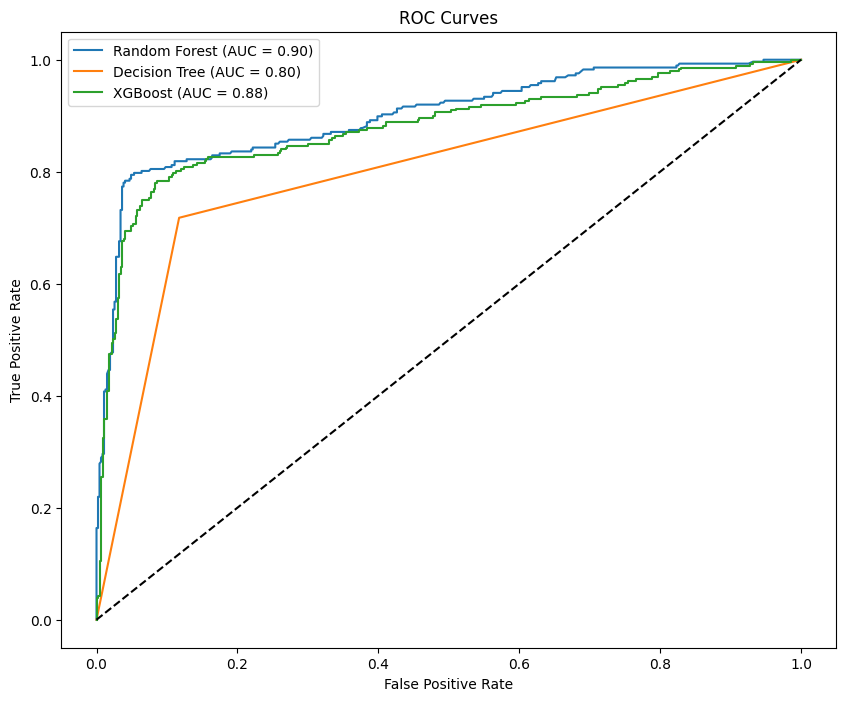

In [145]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test):
    # Tahminler
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Sınıf olasılıkları

    # Metrikler
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    # ROC Eğrisi
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    return accuracy, precision, recall, f1, auc, fpr, tpr

# Model değerlendirmesi
acc_rf, prec_rf, rec_rf, f1_rf, auc_rf, fpr_rf, tpr_rf = evaluate_model(rf_model, X_test, y_test)
acc_dt, prec_dt, rec_dt, f1_dt, auc_dt, fpr_dt, tpr_dt = evaluate_model(dt_model, X_test, y_test)
acc_xgb, prec_xgb, rec_xgb, f1_xgb, auc_xgb, fpr_xgb, tpr_xgb = evaluate_model(xgb_model, X_test, y_test)

# ROC Eğrilerini çizme
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(auc_rf))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.2f})'.format(auc_dt))
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = {:.2f})'.format(auc_xgb))
plt.plot([0, 1], [0, 1], 'k--')  # Rastgele şans çizgisi
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


In [146]:
print("Random Forest Performance:")
print("Accuracy:", acc_rf)
print("Precision:", prec_rf)
print("Recall:", rec_rf)

print("\nXGBoost Performance:")
print("Accuracy:", acc_xgb)
print("Precision:", prec_xgb)
print("Recall:", rec_xgb)

print("\nDecision Tree Performance:")
print("Accuracy:", acc_dt)
print("Precision:", prec_dt)
print("Recall:", rec_dt)

Random Forest Performance:
Accuracy: 0.8928571428571429
Precision: 0.9256198347107438
Recall: 0.7804878048780488

XGBoost Performance:
Accuracy: 0.8597883597883598
Precision: 0.8521400778210116
Recall: 0.7630662020905923

Decision Tree Performance:
Accuracy: 0.8201058201058201
Precision: 0.789272030651341
Recall: 0.7177700348432056
